In [124]:
import numpy as np
import pandas as pd

In [125]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [126]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2339,ham,Cheers for the message Zogtorius. IåÕve been s...,NaN,NaN,NaN
5073,ham,I want to sent &lt;#&gt; mesages today. Thats...,NaN,NaN,NaN
2080,ham,Where is it. Is there any opening for mca.,NaN,NaN,NaN
798,ham,Ok i msg u b4 i leave my house.,NaN,NaN,NaN
1276,ham,Can do lor...,NaN,NaN,NaN


In [127]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [129]:
# Dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [130]:
df.sample(5)

,v1,v2
4310,ham,It so happens that there r 2waxsto do wat you ...
1022,ham,We still on for tonight?
2910,ham,"Sorry,in meeting I'll call later"
4155,ham,"Yo, call me when you get the chance, a friend ..."
4838,ham,That's one of the issues but california is oka...


In [131]:
# Renaming the Columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4899,spam,"ou are guaranteed the latest Nokia Phone, a 40..."
375,ham,Can you say what happen
987,ham,"Geeee ... I miss you already, you know ? Your ..."
1983,ham,I wnt to buy a BMW car urgently..its vry urgen...
4129,ham,And by when you're done I mean now


In [132]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [133]:
df['target']=encoder.fit_transform(df['target'])

In [134]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [137]:
# Checking for duplicate values
df.duplicated().sum()

403

In [138]:
# Removing the duplicate
df=df.drop_duplicates(keep='first')

In [139]:
df.duplicated().sum()

0

In [140]:
df.shape

(5169, 2)

## 2.Exploratory Data Analysis

In [141]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

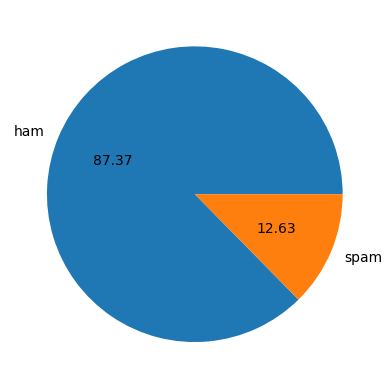

In [143]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [144]:
# Calculating number of words,characters and colums

In [145]:
pip install nltk

In [146]:
import nltk

In [147]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [148]:
df['num_characters'] = df['text'].apply(len)

In [149]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [150]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 

In [151]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [152]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) 

In [153]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [154]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [155]:
# Analysing Spam and Ham separately 

In [156]:
# for Ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [157]:
# for spam messages

In [158]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [159]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

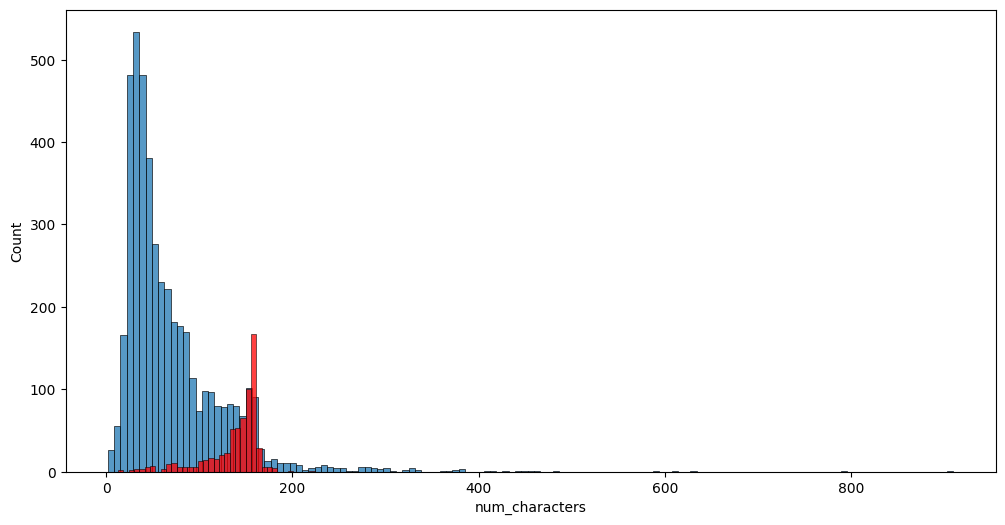

In [160]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red') 

<Axes: xlabel='num_words', ylabel='Count'>

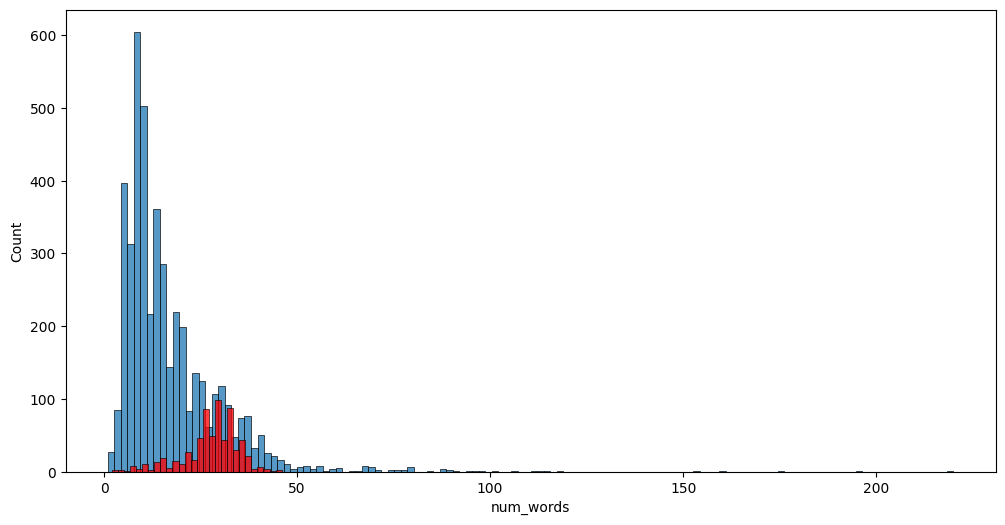

In [161]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red') 

In [162]:
#checking realtionship between columns

C:\Python 3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


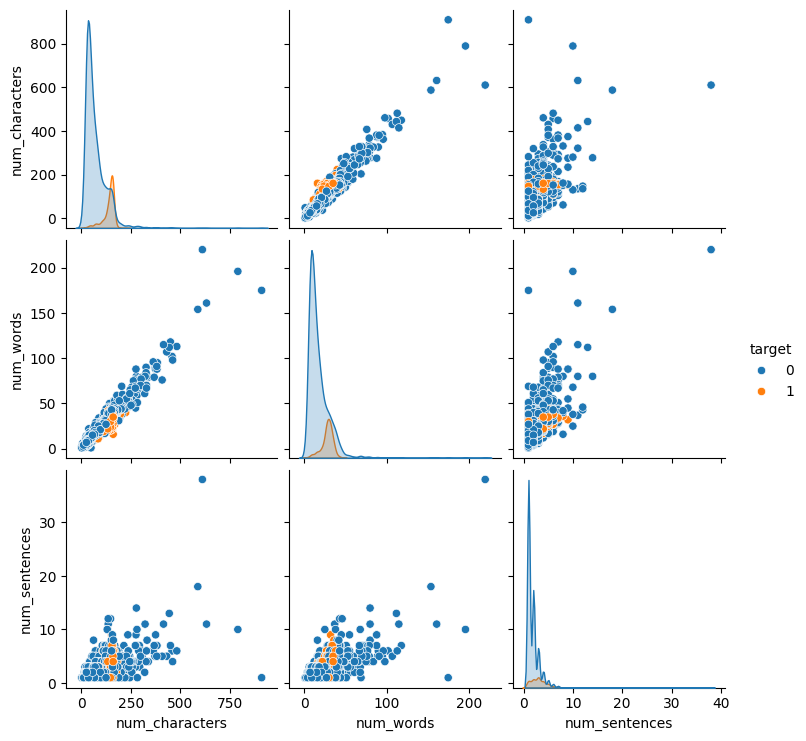

In [163]:
sns.pairplot(df,hue='target')

<Axes: xlabel='num_sentences', ylabel='Count'>

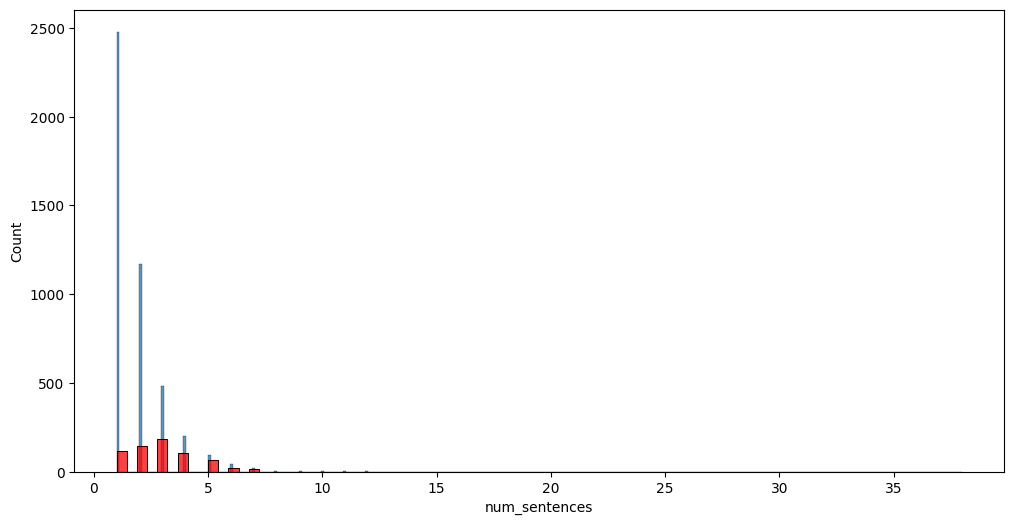

In [164]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red') 

## 3.Data Preprocessing

In [165]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [166]:
transform_text('hi i love you.....Do you love me Kanda?')

'hi love love kanda'

In [167]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [168]:
transform_text(' I am loving a beautiful girl who always like to keep watching the show which are more scary')

'love beauti girl alway like keep watch show scari'

In [169]:
#Checking for the data in the data set
transform_text(' Is that seriously how you spell his name?')

'serious spell name'

In [170]:
df['text'][20]

'Is that seriously how you spell his name?'

In [171]:
df['transformed_text']=df['text'].apply(transform_text)

In [172]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [173]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [174]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [175]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

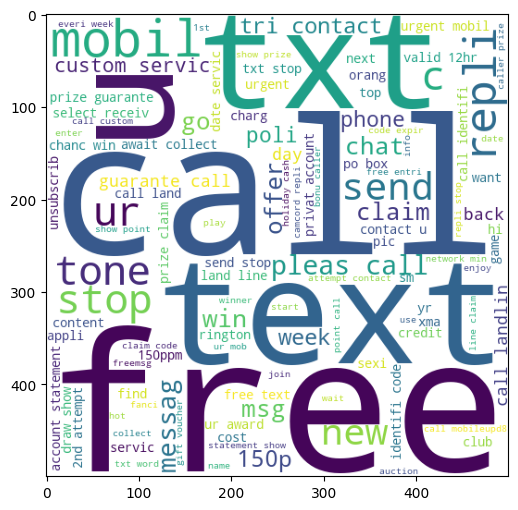

In [176]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [177]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

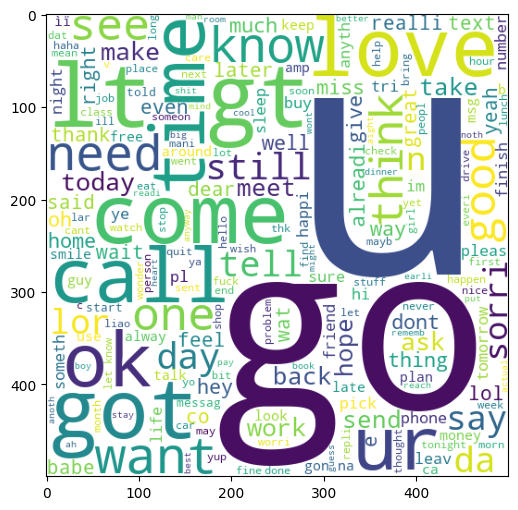

In [178]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [179]:
df[df['target']==1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [180]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [181]:
len(spam_corpus)

9939

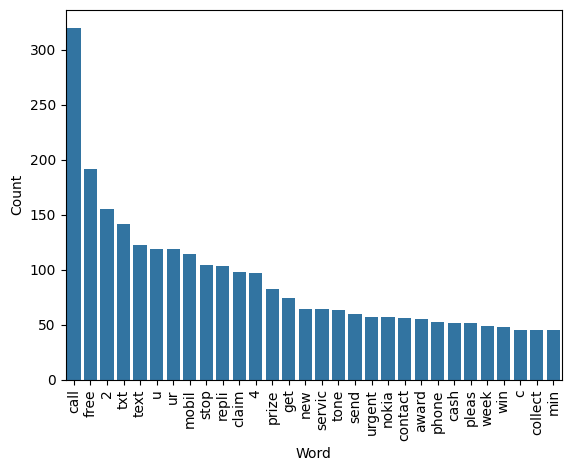

In [182]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


word_counts = Counter(spam_corpus)


common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])


sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [183]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [184]:
len(ham_corpus)

35404

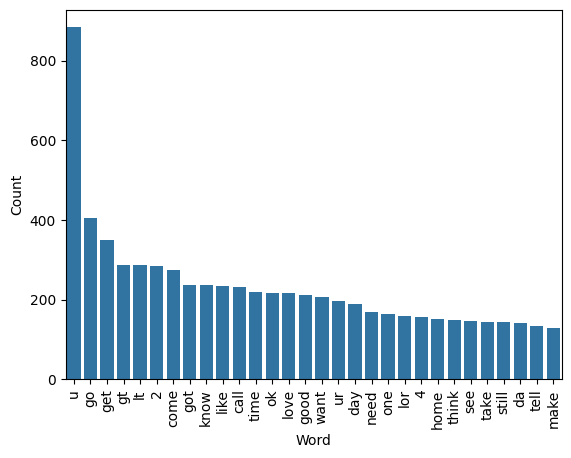

In [185]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


word_counts = Counter(ham_corpus)


common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])


sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()